In [137]:
import numpy as np;
import scipy.linalg as la;
import matplotlib.pyplot as plt;
import scipy.io;
import control.matlab as con;
from scipy.linalg import eig;

In [138]:
data=scipy.io.loadmat('beam.mat')

In [139]:
A=data['A'].todense()
B=data['B']
C=data['C']
E=np.eye(348)
w=data['w'].flatten()
mag=data['mag'].flatten()
W=[]
V=[]
n=30

In [140]:
def H(s):
    I = np.eye(348) 
    Z  = np.linalg.solve(s*E-A,I)
    return C @ Z @ B

In [141]:
mi=np.linspace(-1,-0.01,30)*1j
lam=np.linspace(0.01,1,30)*1j

In [142]:
V = np.hstack([H(s) for s in mi])
W = np.hstack([H(s) for s in lam])

In [143]:
L=np.zeros((n,n),dtype=complex)
L_shift=np.zeros((n,n),dtype=complex)

In [144]:
for i in range(n):
    for j in range(n):
        L[i,j]=(V[0,i]-W[0,j])/(mi[i]-lam[j])
        L_shift[i,j]=(mi[i]*V[0,i]-lam[j]*W[0,j])/(mi[i]-lam[j])

In [145]:
U,SigmaL,Vh=la.svd(L)
U_r,SigmaL_r,Vh_r=la.svd(L_shift)

In [146]:
r = 12
Xr = Vh[:r].conj().T
Yr = U[:, :r]

In [147]:
Ar = -Yr.conj().T @ L_shift @ Xr
Er = -Yr.conj().T @ L @ Xr
Br = Yr.conj().T @ V.T
Cr = W @ Xr

In [151]:
def Hr(s):
    Zr = np.linalg.solve(s*Er-Ar,Br)
    return Cr @ Zr

In [152]:
worg=1j*w

In [153]:
H_original=np.array([H(s) for s in worg])
H_reduced=np.array([Hr(s) for s in worg])

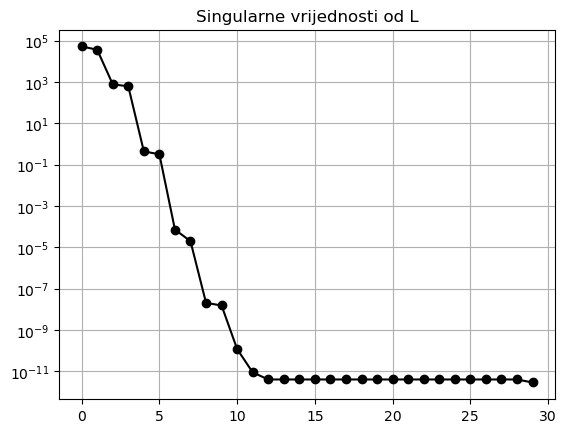

In [154]:
plt.semilogy(SigmaL,'k-o')
plt.title('Singularne vrijednosti od L')
plt.grid()
plt.show()

In [155]:
H_reduced_mag=np.abs(H_reduced).flatten()
H_original_mag=np.abs(H_original).flatten()

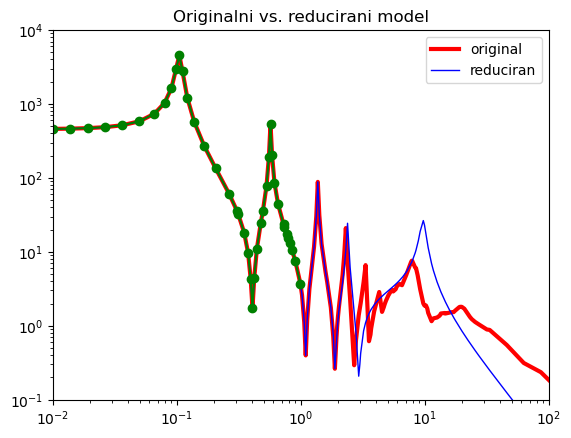

In [156]:
plt.loglog(np.imag(worg),H_original_mag,'r-',linewidth=3,label='original')
plt.loglog(np.imag(worg),H_reduced_mag,'b-',linewidth=1,label='reduciran')
limit_index=np.imag(worg) <= 10**0
plt.loglog(np.imag(worg)[limit_index],mag[limit_index],'g-o')
plt.xlim([1e-2,1e2])
plt.ylim([1e-1,1e4])
plt.legend()
plt.title('Originalni vs. reducirani model')
plt.show()

In [157]:
poles_reduced=eig(Ar,Er)[0]

In [158]:
A = np.array(A)
E = np.array(E)

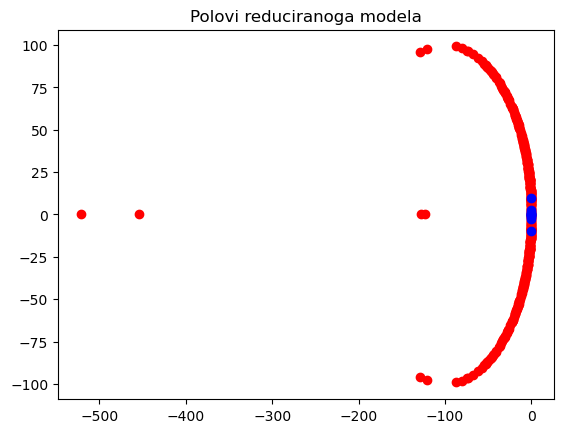

In [161]:
I = np.eye(348)
pooles1 = np.linalg.eig(np.linalg.solve(E,I).dot(A))[0]
plt.plot(pooles1.real,pooles1.imag,'ro',poles_reduced.real,poles_reduced.imag,'bo')
plt.title('Polovi reduciranoga modela')
plt.show()

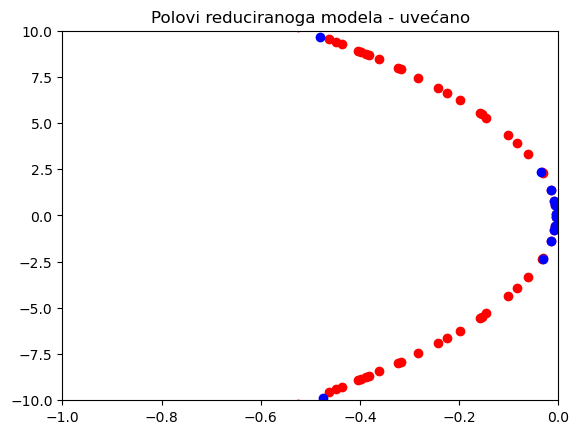

In [162]:
#pooles1=eig(A,E)[0
I = np.eye(348)
pooles1 = np.linalg.eig(np.linalg.solve(E,I).dot(A))[0]
plt.plot(pooles1.real,pooles1.imag,'ro',poles_reduced.real,poles_reduced.imag,'bo')
plt.title('Polovi reduciranoga modela - uvećano')
plt.xlim([-1,0])
plt.ylim([-10,10])
plt.show()